In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,8)

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (25,10)
plt.rcParams.update({'font.size': 22})

df = pd.read_csv('player_catch_bins.csv')

In [2]:
df = df.fillna(0)

df['targets'] = df[['complete_screen_right', 'complete_screen_left',
       'complete_short_middle', 'complete_short_right', 'complete_short_left',
       'complete_mid_middle', 'complete_mid_right', 'complete_mid_left',
       'complete_long_middle', 'complete_long_right', 'complete_long_left',
       'incomplete_screen_right', 'incomplete_screen_left',
       'incomplete_short_middle', 'incomplete_short_right',
       'incomplete_short_left', 'incomplete_mid_middle',
       'incomplete_mid_right', 'incomplete_mid_left', 'incomplete_long_middle',
       'incomplete_long_right', 'incomplete_long_left']].sum(axis=1)

df = df[df.targets > 50]
df = df.reset_index()
df['playerID'] = df.index + 1

In [3]:
df['targets_screen_right'] = df['complete_screen_right'] + df['incomplete_screen_right']
df['targets_screen_left'] = df['complete_screen_left'] + df['incomplete_screen_left']
df['targets_short_middle'] = df['complete_short_middle'] + df['incomplete_short_middle']
df['targets_short_right'] = df['complete_short_right'] + df['incomplete_short_right']
df['targets_short_left'] = df['complete_short_left'] + df['incomplete_short_left']
df['targets_mid_middle'] = df['complete_mid_middle'] + df['incomplete_mid_middle']
df['targets_mid_right'] = df['complete_mid_right'] + df['incomplete_mid_right']
df['targets_mid_left'] = df['complete_mid_left'] + df['incomplete_mid_left']
df['targets_long_middle'] = df['complete_long_middle'] + df['incomplete_long_middle']
df['targets_long_right'] = df['complete_long_right'] + df['incomplete_long_right']
df['targets_long_left'] = df['complete_long_left'] + df['incomplete_long_left']

In [4]:
player_dict_df = df[['targets_screen_right', 'targets_screen_left', 'targets_short_middle',
       'targets_short_right', 'targets_short_left', 'targets_mid_middle',
       'targets_mid_right', 'targets_mid_left', 'targets_long_middle',
       'targets_long_right', 'targets_long_left','Player']]

players = player_dict_df['Player'].to_list()

player_dict_df = player_dict_df.set_index('Player')

player_dict = player_dict_df.to_dict('index')

In [5]:
def get_clusters(k, players):

    clusters = {p:np.nan  for p in range(k)}
    
    random.shuffle(players) 
    
    for j in range(k):  
        lst = [players[i::k] for i in range(k)]
        clusters[j] = [f for f in lst[j]]
          
    return clusters



In [6]:
def get_centroids(clusters):
    
    centroids = {}

    for i,j in clusters.items():

        x1 = np.mean([list(player_dict[x].values())[0] for x in j])
        x2 = np.mean([list(player_dict[x].values())[1] for x in j])
        x3 = np.mean([list(player_dict[x].values())[2] for x in j])
        x4 = np.mean([list(player_dict[x].values())[3] for x in j])
        x5 = np.mean([list(player_dict[x].values())[4] for x in j])
        x6 = np.mean([list(player_dict[x].values())[5] for x in j])
        x7 = np.mean([list(player_dict[x].values())[6] for x in j])
        x8 = np.mean([list(player_dict[x].values())[7] for x in j])
        x9 = np.mean([list(player_dict[x].values())[8] for x in j])
        x10 = np.mean([list(player_dict[x].values())[9] for x in j])
        x11 = np.mean([list(player_dict[x].values())[10] for x in j])

        #for m in range(len(list(clusters.keys()))):
        centroids[i] = (x1,x2,x3,x4,x5,x6,x7,x8, x9, x10, x11)
    
    return centroids

In [7]:
def get_cluster_error(clusters, centroids):

    sse_clusters = []

    for i,j in zip(clusters.items(), centroids.items()):

        sse_clusters.append(
            np.mean(([list(player_dict[x].values())[0] for x in i[1]] - j[1][0])**2)+ 
                  np.mean(([list(player_dict[x].values())[1] for x in i[1]] - j[1][1])**2)+ 
                    np.mean(([list(player_dict[x].values())[2] for x in i[1]] - j[1][2])**2)+ 
                        np.mean(([list(player_dict[x].values())[3] for x in i[1]] - j[1][3])**2)+ 
                            np.mean(([list(player_dict[x].values())[4] for x in i[1]] - j[1][4])**2)+ 
                                np.mean(([list(player_dict[x].values())[5] for x in i[1]] - j[1][5])**2)+ 
                                    np.mean(([list(player_dict[x].values())[6] for x in i[1]] - j[1][6])**2)+ 
                                        np.mean(([list(player_dict[x].values())[7] for x in i[1]] - j[1][7])**2)+
                                            np.mean(([list(player_dict[x].values())[6] for x in i[1]] - j[1][8])**2)+
                                                np.mean(([list(player_dict[x].values())[6] for x in i[1]] - j[1][9])**2)+
                                                    np.mean(([list(player_dict[x].values())[6] for x in i[1]] - j[1][10])**2))

    return sse_clusters, np.mean(sse_clusters)

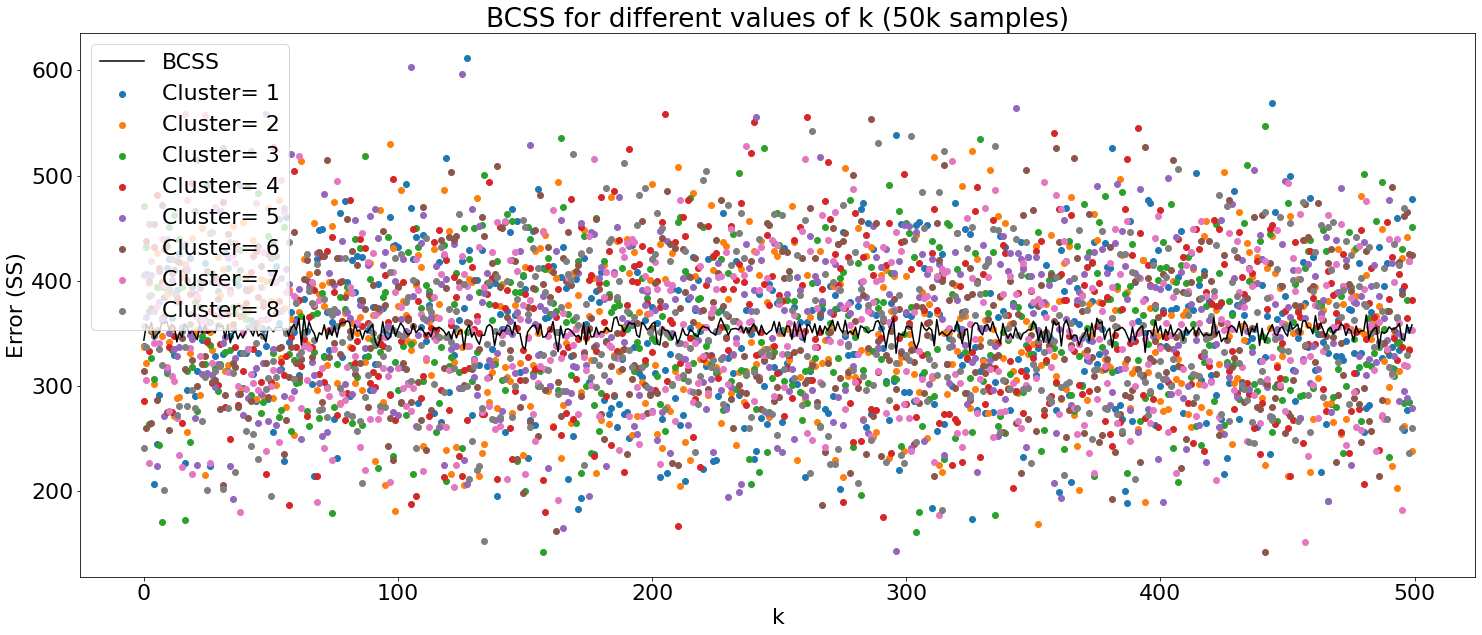

Best Error:
330.92927140725436


In [36]:
def get_results(num_sims, players):

    sims = num_sims

    iters = {"Clusters":[], "Centroids":[], "Error":[], "Average Error": []}
    #ks = {}
    for i in range(sims):
        
        #k = random.randint(3, 25)
        
        clusters = get_clusters(8, players)
        centroids = get_centroids(clusters)
        wcss, bcss = get_cluster_error(clusters, centroids)

        iters['Clusters'].append(clusters)
        iters['Centroids'].append(centroids)
        iters['Error'].append(wcss)
        iters['Average Error'].append(bcss)
        
#         try:
        
#             ks[k].append(bcss)
            
#         except:
            
#             ks[k]=[bcss]
            
    #for m,n in ks.items():
    #plt.plot(list(ks.keys()), ks.values)
        
    #print(iters['Error'])
        
    #print('Error Plot v.s Num Iterations', k)
    
    #for l in iters['Error']:
    for l in range(len(iters['Error'][0])):
        plt.scatter([d for d in range(num_sims)],[pt[l] for pt in iters['Error']],label = 'Cluster= %s'%(l+1))
        
    plt.plot([d for d in range(num_sims)], iters['Average Error'], label = 'BCSS', color= 'black')
    
    plt.legend()
    plt.title('BCSS for different values of k (50k samples)')
    plt.xlabel('k')
    plt.ylabel('Error (SS)')
    plt.show()
    
#     plt.scatter([d for d in range(num_sims)],iters['Average Error'])
#     plt.show()
    #print(ks)   
    best_clusters = iters['Average Error'].index(min(iters['Average Error']))
    print('Best Error:')
    #print(k)
    print(iters['Average Error'][best_clusters])
        
    return iters['Error'][best_clusters], iters['Centroids'][best_clusters], iters['Clusters'][best_clusters], pd.DataFrame(iters['Centroids'][best_clusters])

results1_err,results1_centroids, results1_clusters, centroids_df  = get_results(500, players)        

In [9]:
centroids_df.columns = ['Centroid1', 'Centroid2', 'Centroid3', 'Centroid4', 'Centroid5', 'Centroid6', 'Centroid7', 'Centroid8']



In [10]:
for i,j in results1_clusters.items():
    df.loc[df.Player.isin(j), "Cluster"] = i + 1

In [11]:
df_final = pd.concat([pd.DataFrame(player_dict), centroids_df.set_index(pd.DataFrame(player_dict).index)], axis=1)

In [12]:
affin = {}

for i in players:
    
    affin[i] = []
    
    for j in range(8):
        
        affin[i].append(abs(np.mean(df_final[i] - df_final['Centroid%s'%(j+1)])))

In [13]:
affin_df = pd.DataFrame(affin)
affin_df

,Eric Ebron,James White,Austin Hooper,Dede Westbrook,Theo Riddick,Amari Cooper,Chris Godwin,Chester Rogers,Michael Crabtree,Travis Kelce,...,Rob Gronkowski,Christian McCaffrey,Julio Jones,Tyler Lockett,Marquez Valdes-Scantling,Tyler Boyd,Devin Funchess,Danny Amendola,Jordan Reed,JuJu Smith-Schuster
0,1.439394e-01,0.416667,0.856061,0.401515,2.037879,0.507576,0.765152,2.492424,1.765152,2.780303,...,2.219697,2.234848,4.689394,2.219697,3.219697,0.416667,3.219697,1.310606,1.674242,4.962121
1,1.280992e+00,1.553719,0.280992,0.735537,0.900826,1.644628,0.371901,1.355372,0.628099,3.917355,...,1.082645,3.371901,5.826446,1.082645,2.082645,1.553719,2.082645,0.173554,0.537190,6.099174
2,1.123967e+00,1.396694,0.123967,0.578512,1.057851,1.487603,0.214876,1.512397,0.785124,3.760331,...,1.239669,3.214876,5.669421,1.239669,2.239669,1.396694,2.239669,0.330579,0.694215,5.942149
3,8.074349e-17,0.272727,1.000000,0.545455,2.181818,0.363636,0.909091,2.636364,1.909091,2.636364,...,2.363636,2.090909,4.545455,2.363636,3.363636,0.272727,3.363636,1.454545,1.818182,4.818182
4,1.876033e+00,2.148760,0.876033,1.330579,0.305785,2.239669,0.966942,0.760331,0.033058,4.512397,...,0.487603,3.966942,6.421488,0.487603,1.487603,2.148760,1.487603,0.421488,0.057851,6.694215
5,1.297521e+00,1.570248,0.297521,0.752066,0.884298,1.661157,0.388430,1.338843,0.611570,3.933884,...,1.066116,3.388430,5.842975,1.066116,2.066116,1.570248,2.066116,0.157025,0.520661,6.115702
6,1.289256e+00,1.016529,2.289256,1.834711,3.471074,0.925620,2.198347,3.925620,3.198347,1.347107,...,3.652893,0.801653,3.256198,3.652893,4.652893,1.016529,4.652893,2.743802,3.107438,3.528926
7,4.628099e-01,0.735537,0.537190,0.082645,1.719008,0.826446,0.446281,2.173554,1.446281,3.099174,...,1.900826,2.553719,5.008264,1.900826,2.900826,0.735537,2.900826,0.991736,1.355372,5.280992


In [14]:
clust = {}

for i,j in affin.items():
    clust[i] = j.index(min(j)) + 1

In [15]:
df_cluster = pd.DataFrame(clust, index = [i for i in range(len(players))]).T.reset_index()[['index', 0]]
df_cluster.columns = ['Player', 'cluster']

In [16]:
df_cluster.to_csv('clusters.csv')
affin_df.to_csv('affinities.csv')

In [23]:
df[df.Cluster == 4]

,index,Player,complete_screen_right,complete_screen_left,complete_short_middle,complete_short_right,complete_short_left,complete_mid_middle,complete_mid_right,complete_mid_left,...,targets_short_middle,targets_short_right,targets_short_left,targets_mid_middle,targets_mid_right,targets_mid_left,targets_long_middle,targets_long_right,targets_long_left,Cluster
8,31,Antonio Callaway,5,8,6,3,6,1,6,1,...,8,5,6,3,8,3,3,3,2,4.0
10,48,Brandin Cooks,8,7,9,4,10,13,6,13,...,9,6,13,17,8,13,4,8,7,4.0
21,125,Davante Adams,6,9,14,9,37,7,5,10,...,16,12,39,9,7,13,2,5,11,4.0
29,159,Donte Moncrief,3,0,10,8,6,1,9,5,...,12,10,6,3,14,7,0,5,4,4.0
50,274,Julian Edelman,3,8,15,13,11,11,4,6,...,16,14,13,15,4,6,2,1,2,4.0
64,377,Nyheim Hines,15,11,14,7,14,0,1,0,...,17,7,16,0,1,0,0,1,2,4.0
67,403,Rob Gronkowski,1,0,12,8,5,13,3,3,...,12,10,5,16,4,5,2,7,0,4.0
70,428,Saquon Barkley,24,23,13,15,12,1,1,0,...,17,15,13,1,1,0,0,3,0,4.0
72,437,Stefon Diggs,13,11,8,21,25,4,8,3,...,12,23,29,5,9,5,5,2,4,4.0
73,439,Sterling Shepard,6,2,16,15,6,5,8,3,...,19,19,7,8,9,3,3,5,4,4.0
